# Description
Đây là một dataset liên quan đến khả năng của một người có thể vay được bao nhiêu tiền từ việc thế chấp căn nhà của mình. Dataset này gồm các feature sau đây:
* Customer ID: ID của khách hàng xin vay tiền
* Name: Tên của khách hàng xin vay tiền 
* Gender: Giới tính của khách hàng xin vay tiền (gồm hai giá trị là 'F' và 'M')
* Age: Tuổi của khách hàng xin vay tiền (gồm các giá trị số nguyên dương)
* Income (USD): Thu nhập của khách hàng với đơn vị là USD (giá trị là một số dương)
* Income Stability: Mức độ ổn định thu nhập của khách hàng (gồm ba giá trị là Low và High)
* Property Age: Tuổi thọ của ngôi nhà tính bằng ngày (gồm các giá trị số nguyên dương)
* Property Location: Địa điểm của ngôi nhà (gồm 'Rural', 'Urban', và 'Semi-Urban')
* Property Price: Giá trị của ngôi nhà tính theo USD (gồm các giá trị số thực dương)
* Loan Sanction Amount (USD): Số tiền mà khách hàng có thể vay được theo USD (target value)

Dựa vào bài mẫu thực hành số 1 hãy tiến hành:
1. Đọc dữ liệu
2. Visualize một số thông tin của data
3. Chuẩn hóa Data để train linear regression model
4. Train linear regression model và cho biết intercept, coeficients của model
5. Tìm hiểu trên sklearn cách dùng của Ridge, Lasso, và ElasticNet so sánh error cả 3 thuật toán này với Linear Regression (https://scikit-learn.org/stable/index.html)
6. Hãy dùng thử Polynomial bậc 2 để so sánh các kết quả trước đó, kết quả sẽ như thế nào nếu ta chọn bậc n quá cao

Link nộp bài: https://docs.google.com/forms/d/14Q70-4Z_ibWUNhwZ-WEHjpejyZkfPIwPX2TCIeBWhJg/edit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset /Machine Learning/final_house_loan.csv')
df

Gender  Age  Income (USD) Income Stability  Property Age  \
0          F   19       1641.25              Low       1651.25   
1          M   29       1989.71              Low       1990.71   
2          F   37       1849.91              Low       1856.91   
3          M   65       2735.18             High       2747.18   
4          F   62       4741.78             High       4740.78   
...      ...  ...           ...              ...           ...   
47292      F   62       2121.48              Low       2135.48   
47293      M   38       1506.72              Low       1505.72   
47294      F   20       1595.10              Low       1582.10   
47295      F   50       2002.27              Low       2007.27   
47296      F   46        492.91              Low        497.91   

      Property Location  Property Price  Loan Sanction Amount (USD)  
0                 Rural        59641.82                21026.420753  
1                 Urban       179858.51                60595.183366  
2                 Rural       117297.62                39181.648002  
3                 Rural       354417.72               128497.710865  
4                 Urban        82049.80                39386.919336  
...                 ...             ...                         ...  
47292             Rural       240291.63                78800.491330  
47293             Rural       218431.37                72483.293359  
47294        Semi-Urban       154458.88                52462.861498  
47295        Semi-Urban        72277.78                22909.596763  
47296             Rural        24597.61                 5941.989388  

[47297 rows x 8 columns]

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(
    df, title="Pandas Profiling Report Dataset"
)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

Age  Income (USD)  Property Age  Property Price  \
count  47251.000000  47251.000000  47251.000000    4.725100e+04   
mean      40.005185   2586.498103   2586.467247    1.350981e+05   
std       16.086562   1557.676706   1557.737980    9.459404e+04   
min       18.000000    372.700000    370.700000    7.859620e+03   
25%       25.000000   1653.735000   1652.820000    6.251069e+04   
50%       40.000000   2245.460000   2244.810000    1.130936e+05   
75%       55.000000   3128.610000   3128.570000    1.819546e+05   
max       65.000000  54662.750000  54647.750000    1.077967e+06   

       Loan Sanction Amount (USD)  
count                47251.000000  
mean                 46474.467952  
std                  32545.590334  
min                    254.586578  
25%                  21775.599375  
50%                  38818.433721  
75%                  62574.719455  
max                 366131.165218

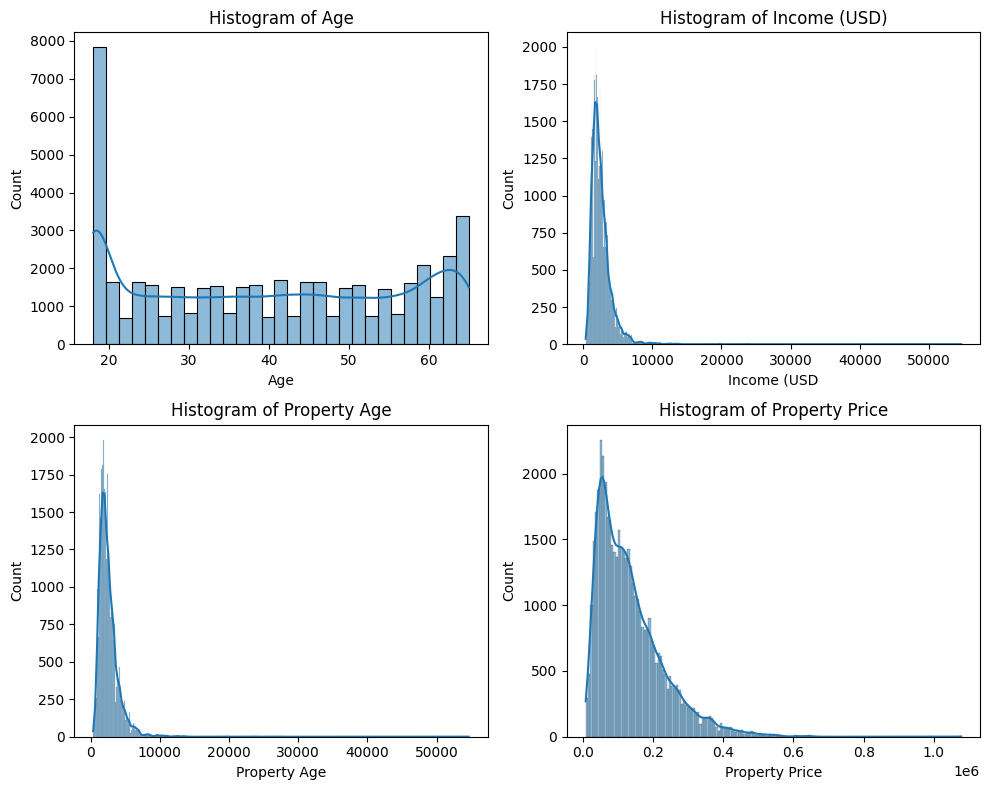

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

sns.histplot(data=df['Age'], ax=ax[0, 0], kde=True)
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_title('Histogram of Age')

sns.histplot(data=df['Income (USD)'], ax=ax[0, 1], kde=True)
ax[0, 1].set_xlabel('Income (USD')
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_title('Histogram of Income (USD)')

sns.histplot(data=df['Property Age'], ax=ax[1, 0], kde=True)
ax[1, 0].set_xlabel('Property Age')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('Histogram of Property Age')

sns.histplot(data=df['Property Price'], ax=ax[1, 1], kde=True)
ax[1, 1].set_xlabel('Property Price')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_title('Histogram of Property Price')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

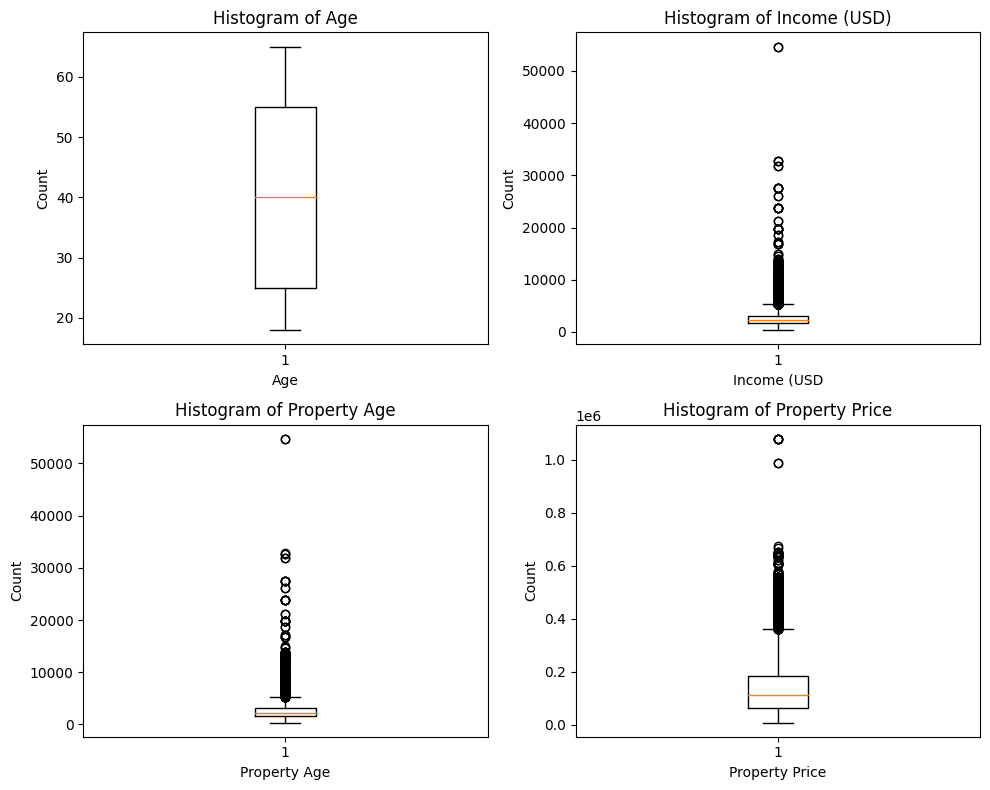

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

ax[0, 0].boxplot(df['Age'])
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_title('Histogram of Age')

ax[0, 1].boxplot(df['Income (USD)'])
ax[0, 1].set_xlabel('Income (USD')
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_title('Histogram of Income (USD)')

ax[1, 0].boxplot(df['Property Age'])
ax[1, 0].set_xlabel('Property Age')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('Histogram of Property Age')

ax[1, 1].boxplot(df['Property Price'])
ax[1, 1].set_xlabel('Property Price')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_title('Histogram of Property Price')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

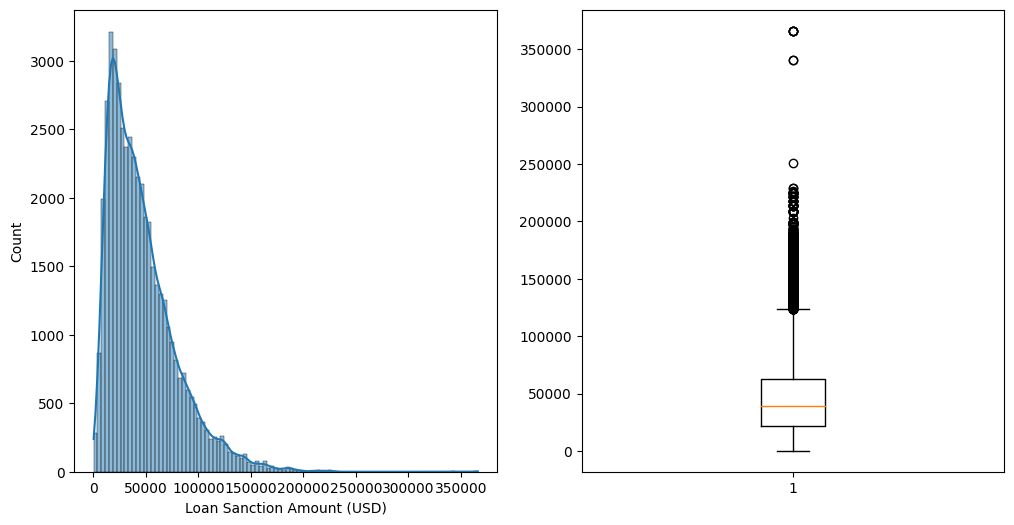

In [ ]:
Q1 = df['Loan Sanction Amount (USD)'].quantile(0.25) # or Q1 = np.percentile(df['column'], 0.25)
Q3 = df['Loan Sanction Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR
#plot Boxplot
fig, ax= plt.subplots(1, 2, figsize =(12, 6))
sns.histplot(data = df['Loan Sanction Amount (USD)'], ax = ax[0], bins = 100, kde = True)
ax[1].boxplot(df['Loan Sanction Amount (USD)'])
plt.show()

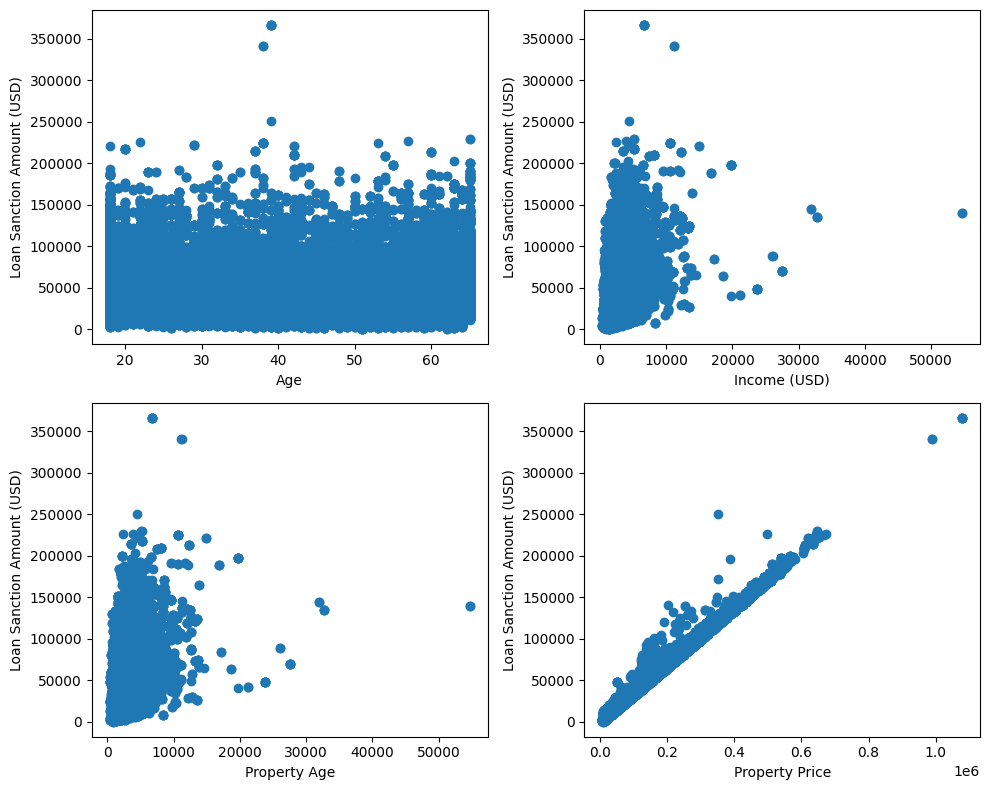

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

ax[0, 0].scatter(df['Age'],df['Loan Sanction Amount (USD)'])
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Loan Sanction Amount (USD)')

ax[0, 1].scatter(df['Income (USD)'],df['Loan Sanction Amount (USD)'])
ax[0, 1].set_xlabel('Income (USD)')
ax[0, 1].set_ylabel('Loan Sanction Amount (USD)')

ax[1, 0].scatter(df['Property Age'],df['Loan Sanction Amount (USD)'])
ax[1, 0].set_xlabel('Property Age')
ax[1, 0].set_ylabel('Loan Sanction Amount (USD)')

ax[1, 1].scatter(df['Property Price'],df['Loan Sanction Amount (USD)'])
ax[1, 1].set_xlabel('Property Price')
ax[1, 1].set_ylabel('Loan Sanction Amount (USD)')

plt.tight_layout()
plt.show()

Many Distribution of numerical features and Target feature are right skewed distribution. More over, Target have a lots outlier

Now take a look categorical features

In [ ]:
print(df['Income Stability'].value_counts())
print(df['Gender'].value_counts())
df['Property Location'].value_counts()

Low     43045
High     4206
Name: Income Stability, dtype: int64
F    23646
M    23605
Name: Gender, dtype: int64


Semi-Urban    16361
Rural         15941
Urban         14949
Name: Property Location, dtype: int64

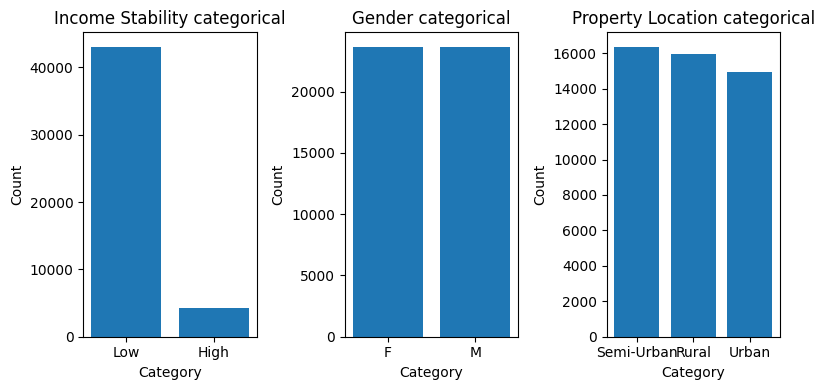

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (8, 4))

Income_cate = df['Income Stability'].value_counts()
Gender_cate = df['Gender'].value_counts()
Prop_cate = df['Property Location'].value_counts()
# Create bar chart
ax[0].bar(Income_cate.index, Income_cate.values)
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].set_title('Income Stability categorical')

ax[1].bar(Gender_cate.index, Gender_cate.values)
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count')
ax[1].set_title('Gender categorical')

ax[2].bar(Prop_cate.index, Prop_cate.values)
ax[2].set_xlabel('Category')
ax[2].set_ylabel('Count')
ax[2].set_title('Property Location categorical')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

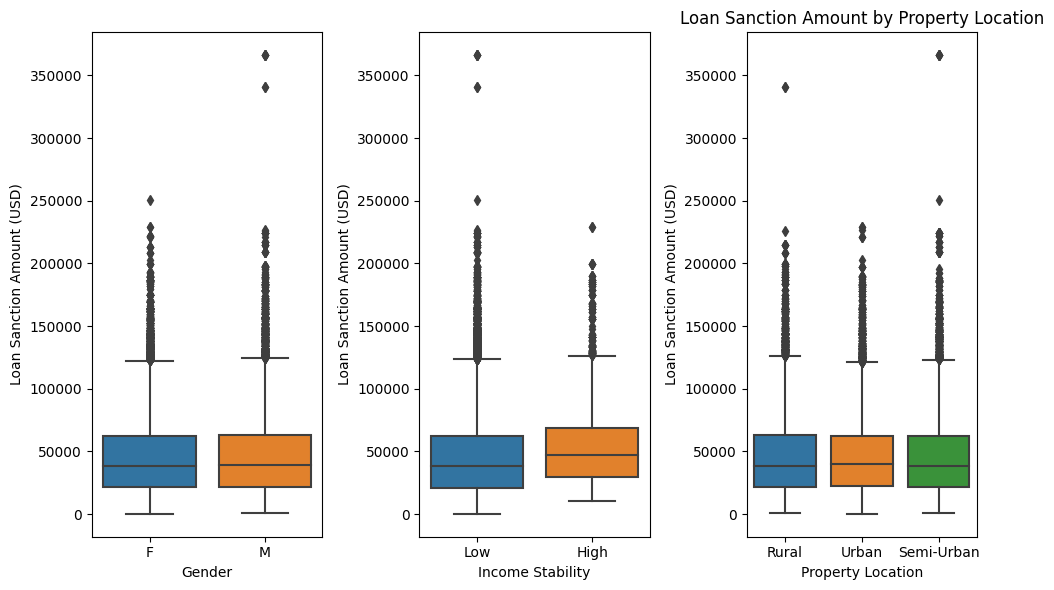

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots
fig, ax = plt.subplots(1, 3, figsize = (10, 6))
sns.boxplot(x='Gender', y='Loan Sanction Amount (USD)', ax = ax[0], data=df)
plt.title('Loan Sanction Amount by Gender')

sns.boxplot(x='Income Stability', y='Loan Sanction Amount (USD)', ax = ax[1], data=df)
plt.title('Loan Sanction Amount by Income Stability')

sns.boxplot(x='Property Location', y='Loan Sanction Amount (USD)', ax = ax[2], data=df)
plt.title('Loan Sanction Amount by Property Location')

plt.tight_layout()
plt.show()

<Axes: >

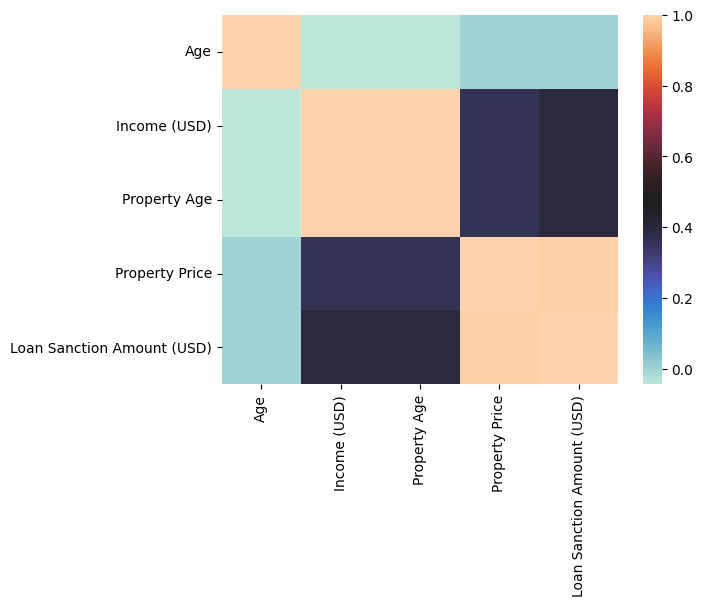

In [ ]:
sns.heatmap(df.corr(), cmap = 'icefire')

# Feature Engineering

In [ ]:
preprocessed_df = df.copy()

## Encoding

Because Gender, Income Stability, and Property Location are Nominal (not Ordinal) so I apply One-Hot Encoding to Encoding categorical to numeric by using get_dummies from Pandas (Or can use OneHotEncoder from sklearn.preprocessing)

In [ ]:
preprocessed_df = pd.get_dummies(df, prefix = ['Gender','Income_Stability','Property_Location'], columns = ['Gender','Income Stability','Property Location'])
preprocessed_df

Age  Income (USD)  Property Age  Property Price  \
0       19       1641.25       1651.25        59641.82   
1       29       1989.71       1990.71       179858.51   
2       37       1849.91       1856.91       117297.62   
3       65       2735.18       2747.18       354417.72   
4       62       4741.78       4740.78        82049.80   
...    ...           ...           ...             ...   
47292   62       2121.48       2135.48       240291.63   
47293   38       1506.72       1505.72       218431.37   
47294   20       1595.10       1582.10       154458.88   
47295   50       2002.27       2007.27        72277.78   
47296   46        492.91        497.91        24597.61   

       Loan Sanction Amount (USD)  Gender_F  Gender_M  Income_Stability_High  \
0                    21026.420753         1         0                      0   
1                    60595.183366         0         1                      0   
2                    39181.648002         1         0                      0   
3                   128497.710865         0         1                      1   
4                    39386.919336         1         0                      1   
...                           ...       ...       ...                    ...   
47292                78800.491330         1         0                      0   
47293                72483.293359         0         1                      0   
47294                52462.861498         1         0                      0   
47295                22909.596763         1         0                      0   
47296                 5941.989388         1         0                      0   

       Income_Stability_Low  Property_Location_Rural  \
0                         1                        1   
1                         1                        0   
2                         1                        1   
3                         0                        1   
4                         0                        0   
...                     ...                      ...   
47292                     1                        1   
47293                     1                        1   
47294                     1                        0   
47295                     1                        0   
47296                     1                        1   

       Property_Location_Semi-Urban  Property_Location_Urban  
0                                 0                        0  
1                                 0                        1  
2                                 0                        0  
3                                 0                        0  
4                                 0                        1  
...                             ...                      ...  
47292                             0                        0  
47293                             0                        0  
47294                             1                        0  
47295                             1                        0  
47296                             0                        0  

[47251 rows x 12 columns]

In [ ]:
# from sklearn.preprocessing import LabelEncoder 
# Encoder = LabelEncoder()
# preprocessed_df['Gender'] = Encoder.fit_transform(preprocessed_df['Gender'])
# preprocessed_df['Income Stability'] = Encoder.fit_transform(preprocessed_df['Income Stability'])
# preprocessed_df['Property Location'] = Encoder.fit_transform(preprocessed_df['Property Location'])

## Feature Crossing

This feature engineering just for fun =)) It not improve model much

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [ ]:
preprocessed_df['Income_per_Property'] = preprocessed_df['Income (USD)'] * preprocessed_df['Property Price']
preprocessed_df['Income_per_Age'] = preprocessed_df['Income (USD)'] * preprocessed_df['Age']
preprocessed_df

Age  Income (USD)  Property Age  Property Price  \
0       19       1641.25       1651.25        59641.82   
1       29       1989.71       1990.71       179858.51   
2       37       1849.91       1856.91       117297.62   
3       65       2735.18       2747.18       354417.72   
4       62       4741.78       4740.78        82049.80   
...    ...           ...           ...             ...   
47292   62       2121.48       2135.48       240291.63   
47293   38       1506.72       1505.72       218431.37   
47294   20       1595.10       1582.10       154458.88   
47295   50       2002.27       2007.27        72277.78   
47296   46        492.91        497.91        24597.61   

       Loan Sanction Amount (USD)  Gender_F  Gender_M  Income_Stability_High  \
0                    21026.420753         1         0                      0   
1                    60595.183366         0         1                      0   
2                    39181.648002         1         0                      0   
3                   128497.710865         0         1                      1   
4                    39386.919336         1         0                      1   
...                           ...       ...       ...                    ...   
47292                78800.491330         1         0                      0   
47293                72483.293359         0         1                      0   
47294                52462.861498         1         0                      0   
47295                22909.596763         1         0                      0   
47296                 5941.989388         1         0                      0   

       Income_Stability_Low  Property_Location_Rural  \
0                         1                        1   
1                         1                        0   
2                         1                        1   
3                         0                        1   
4                         0                        0   
...                     ...                      ...   
47292                     1                        1   
47293                     1                        1   
47294                     1                        0   
47295                     1                        0   
47296                     1                        1   

       Property_Location_Semi-Urban  Property_Location_Urban  \
0                                 0                        0   
1                                 0                        1   
2                                 0                        0   
3                                 0                        0   
4                                 0                        1   
...                             ...                      ...   
47292                             0                        0   
47293                             0                        0   
47294                             1                        0   
47295                             1                        0   
47296                             0                        0   

       Income_per_Property  Income_per_Age  
0             9.788714e+07        31183.75  
1             3.578663e+08        57701.59  
2             2.169900e+08        68446.67  
3             9.693963e+08       177786.70  
4             3.890621e+08       293990.36  
...                    ...             ...  
47292         5.097739e+08       131531.76  
47293         3.291149e+08        57255.36  
47294         2.463774e+08        31902.00  
47295         1.447196e+08       100113.50  
47296         1.212441e+07        22673.86  

[47251 rows x 14 columns]

<Axes: xlabel='Income_per_Property', ylabel='Count'>

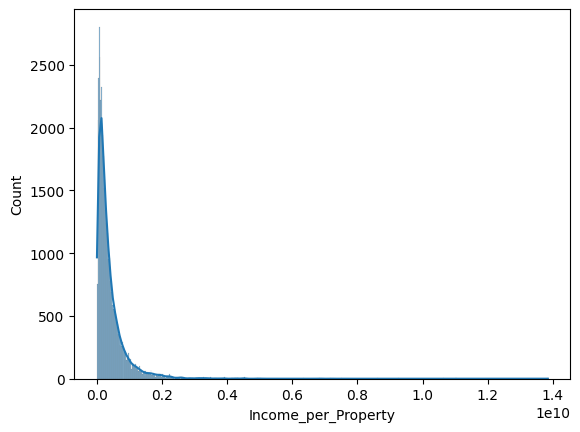

In [ ]:
sns.histplot(data=preprocessed_df['Income_per_Property'], kde=True)

## Transform Distribution

Cause distribution of features are skew left so I apply Box-cos Transformation to change distribution into Gaussian (Yeo-johnson have same distribution, Logarit not much good)

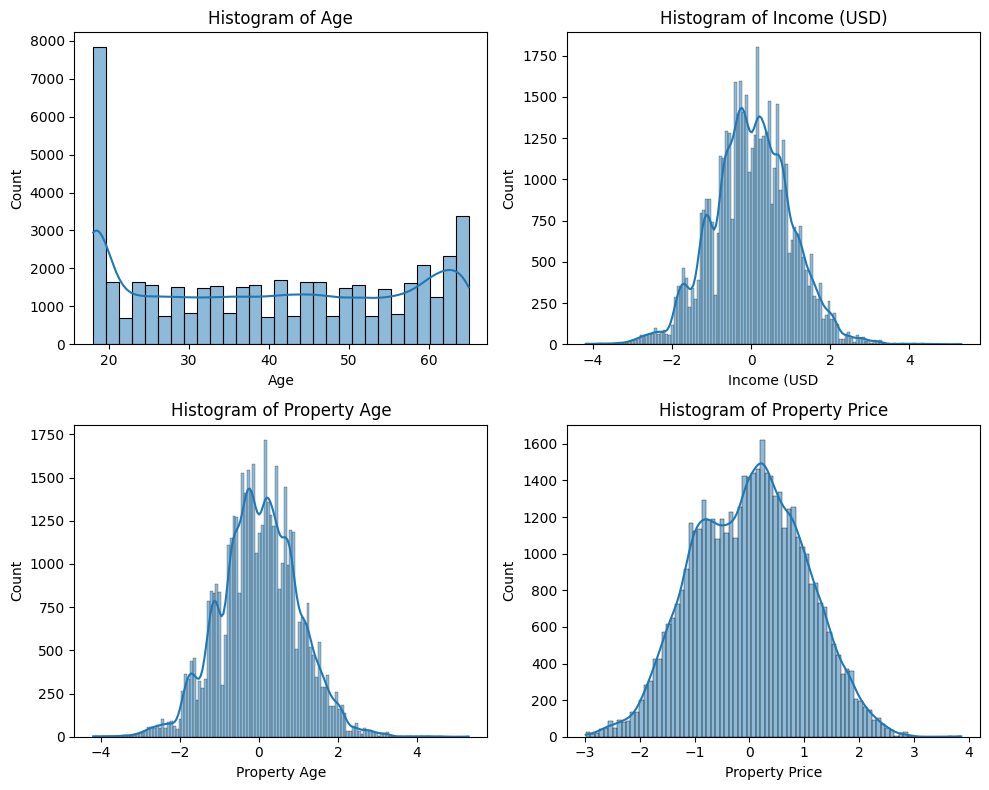

In [ ]:
## preprocessed_df['Income (USD)'] = (preprocessed_df['Income (USD)']+1).transform(np.log)
## preprocessed_df['Property Age'] = (preprocessed_df['Property Age']+1).transform(np.log)
## preprocessed_df['Property Price'] = (preprocessed_df['Property Price']+1).transform(np.log)

# preprocessed_df['Income (USD)'] = scaler.fit_transform(preprocessed_df['Income (USD)'].values.reshape(-1, 1))
# preprocessed_df['Property Age'] = scaler.fit_transform(preprocessed_df['Property Age'].values.reshape(-1, 1))
# preprocessed_df['Property Price'] = scaler.fit_transform(preprocessed_df['Property Price'].values.reshape(-1, 1))

# fig, ax = plt.subplots(2, 2, figsize = (10, 8))

# sns.histplot(data=preprocessed_df['Age'], ax=ax[0, 0], kde=True)
# ax[0, 0].set_xlabel('Age')
# ax[0, 0].set_ylabel('Count')
# ax[0, 0].set_title('Histogram of Age')

# sns.histplot(data=preprocessed_df['Income (USD)'], ax=ax[0, 1], kde=True)
# ax[0, 1].set_xlabel('Income (USD')
# ax[0, 1].set_ylabel('Count')
# ax[0, 1].set_title('Histogram of Income (USD)')

# sns.histplot(data=preprocessed_df['Property Age'], ax=ax[1, 0], kde=True)
# ax[1, 0].set_xlabel('Property Age')
# ax[1, 0].set_ylabel('Count')
# ax[1, 0].set_title('Histogram of Property Age')

# sns.histplot(data=preprocessed_df['Property Price'], ax=ax[1, 1], kde=True)
# ax[1, 1].set_xlabel('Property Price')
# ax[1, 1].set_ylabel('Count')
# ax[1, 1].set_title('Histogram of Property Price')

# # Adjust layout and display plot
# plt.tight_layout()
# plt.show()

We can scale Target either, but I dont wanna do that cause I wanna experiment with same scale Target data to compare each results

In [ ]:
# preprocessed_df['log'] = (preprocessed_df['Loan Sanction Amount (USD)']+1).transform(np.log)

# preprocessed_df['Loan Sanction Amount (USD)'] = scaler.fit_transform(preprocessed_df['Loan Sanction Amount (USD)'].values.reshape(-1, 1))
# preprocessed_df

# rescaled_data = pd.DataFrame(scaler.inverse_transform(preprocessed_df['yeo-johnson'].values.reshape(-1 ,1)))

## Discretization

I have also tried this binning Age but it not improve training much, so we can skip

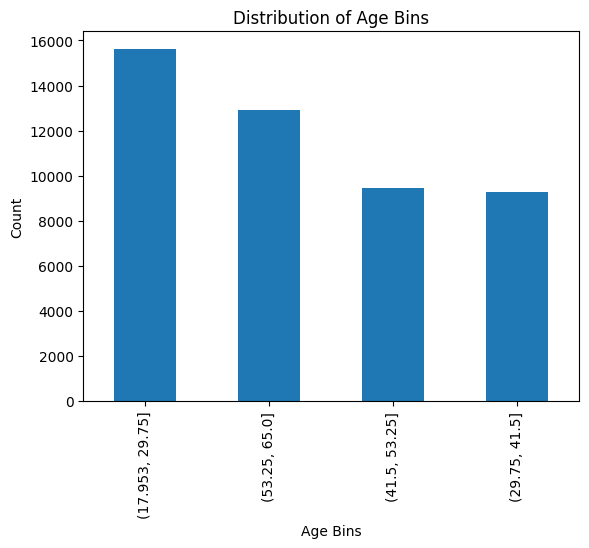

In [ ]:
# bins = 4

# preprocessed_df["Age_Bins"] = pd.cut(preprocessed_df["Age"], bins=bins)

# age_counts = preprocessed_df["Age_Bins"].value_counts()

# age_counts.plot.bar()
# plt.xlabel("Age Bins")
# plt.ylabel("Count")
# plt.title("Distribution of Age Bins")
# plt.show()

In [ ]:
# age_dummies = pd.get_dummies(preprocessed_df["Age_Bins"], prefix="Age_Bins")

# preprocessed_df = pd.concat([preprocessed_df, age_dummies], axis=1)

# preprocessed_df.drop("Age_Bins", axis=1, inplace=True)

## Handling Outlier

I recommend remove outlier cause percentile of outlier is kinda small ~5%. I have already tried imputation but I have no idea why it leads to overfitting =))

In [ ]:
def remove_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], 0.25)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    data = data.drop(outliers.index)

    return data

def imputate_outlier(data, feature, lower_bound, upper_bound):
    Q1 = data[feature].quantile(lower_bound) # or Q1 = np.percentile(df['column'], lower_bound)
    Q3 = data[feature].quantile(upper_bound)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5*IQR
    upper_extreme = Q3 + 1.5*IQR

    outliers = data[(data[feature] < lower_extreme) | (data[feature] > upper_extreme)]
    percent_outliers = len(outliers) / len(data) * 100
    print('Percent of outlier in',feature,':',percent_outliers)

    mean = data[feature].median() # median = df['column'].median()
    data.loc[df[feature] < lower_extreme, feature] = Q1 # or mean
    data.loc[df[feature] > upper_extreme, feature] = Q3 # or mean

    return data

In [ ]:
preprocessed_df = remove_outlier(preprocessed_df, 'Income (USD)', 0.25, 0.75)

preprocessed_df = remove_outlier(preprocessed_df, 'Property Price', 0.25, 0.75)

preprocessed_df = remove_outlier(preprocessed_df, 'Property Age', 0.25, 0.75)

preprocessed_df = remove_outlier(preprocessed_df, 'Loan Sanction Amount (USD)', 0.25, 0.75)

Percent of outlier in Income (USD) : 4.393557808300354
Percent of outlier in Property Price : 3.134477033757609
Percent of outlier in Property Age : 1.6819397152585753
Percent of outlier in Loan Sanction Amount (USD) : 0.8507077609650651


Percent of outlier: 0.22739526924068731


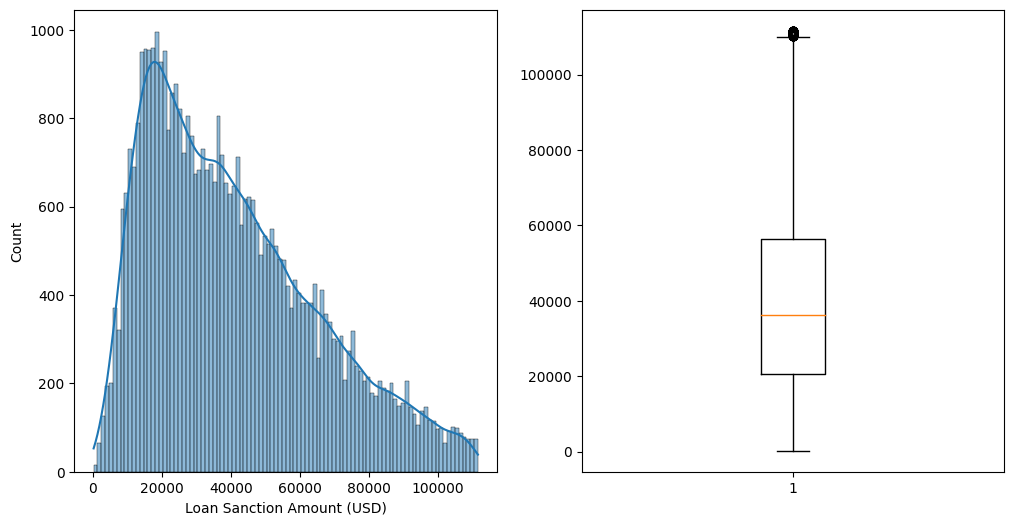

In [ ]:
Q1 = preprocessed_df['Loan Sanction Amount (USD)'].quantile(0.25) # or Q1 = np.percentile(df['column'], 0.25)
Q3 = preprocessed_df['Loan Sanction Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR

outliers = preprocessed_df[(preprocessed_df['Loan Sanction Amount (USD)'] < lower_extreme) | (preprocessed_df['Loan Sanction Amount (USD)'] > upper_extreme)]
percent_outliers = len(outliers) / len(preprocessed_df) * 100
print('Percent of outlier:',percent_outliers)

#plot Boxplot
fig, ax= plt.subplots(1, 2, figsize =(12, 6))
sns.histplot(data = preprocessed_df['Loan Sanction Amount (USD)'], ax = ax[0], bins = 100, kde = True)
ax[1].boxplot(preprocessed_df['Loan Sanction Amount (USD)'])
plt.show()

## Correlation

<Axes: >

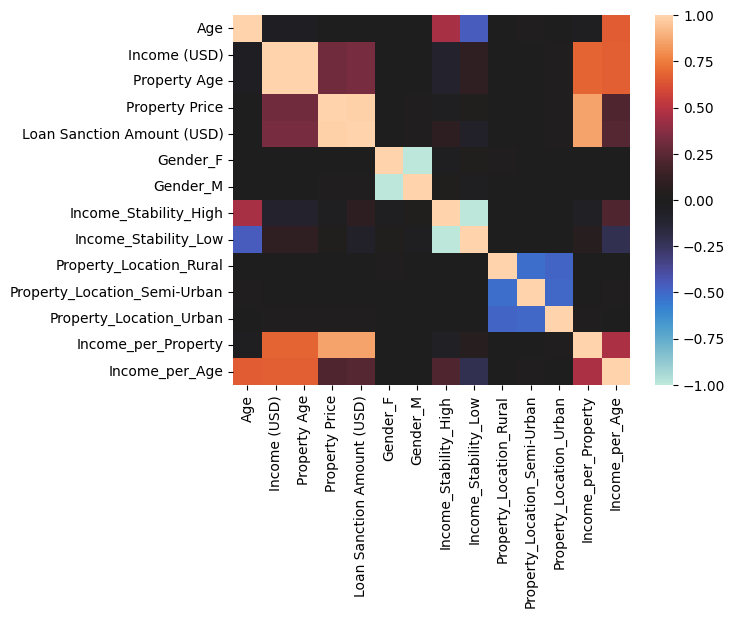

In [ ]:
sns.heatmap(preprocessed_df.corr(), cmap = 'icefire')

Seem likes Income and Property age have a very high positive correlation, we can drop 1 of them to training (I have tried and MAE change not much). Additionally, 3 categories have been encoded are negative correlation with its values of each category

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

In [ ]:
X = preprocessed_df.drop(['Loan Sanction Amount (USD)'], axis =1)
Y = preprocessed_df['Loan Sanction Amount (USD)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((29859, 13), (12798, 13), (29859,), (12798,))

In [ ]:
# Scaler = StandardScaler()
# X_train = Scaler.fit_transform(X_train)
# X_test = Scaler.fit_transform(X_test)

# Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE

In [ ]:
def model_evaluation(model, X_train, Y_train, X_test, Y_test):
    Y_predicted_test = model.predict(X_test)
    Y_predicted_train = model.predict(X_train)
    
    print('Coeffecient:',model.coef_ )
    print('Intercept:',model.intercept_) 

    print('Mean Absoture Error of training set:', MAE(Y_predicted_train, Y_train))
    print('Mean Squared Error of training set:', MSE(Y_predicted_train, Y_train))

    print('Mean Absoture Error of test set:', MAE(Y_predicted_test, Y_test))
    print('Mean Squared Error of test set:', MSE(Y_predicted_test, Y_test))

In [ ]:
LR = LinearRegression().fit(X_train, Y_train)

model_evaluation(LR, X_train, Y_train, X_test, Y_test)
#MAE = 88.44254415522455
#MSE = 1122249.4597231857

Coeffecient: [-7.71779510e+01  5.72581308e-01  5.07139078e-01  3.36224922e-01
  1.15293764e+02 -1.15293764e+02  5.58640793e+03 -5.58640793e+03
  1.32998787e+02 -1.44779958e+02  1.17811710e+01 -1.02237658e-07
 -9.22634012e-04]
Intercept: 6057.816515836559
Mean Absoture Error of training set: 88.40184730454371
Mean Squared Error of training set: 1031389.4438395186
Mean Absoture Error of test set: 88.44254415522455
Mean Squared Error of test set: 1122249.4597231857


In [ ]:
Rid = Ridge(alpha = 1e-6, solver = 'auto', random_state = 42).fit(X_train, Y_train)

model_evaluation(Rid, X_train, Y_train, X_test, Y_test)
#MAE = 88.44254426006728
#MSE = 1122249.4597158537

Coeffecient: [-7.71779510e+01  5.72581309e-01  5.07139077e-01  3.36224922e-01
  1.15293804e+02 -1.15293724e+02  5.58641014e+03 -5.58640573e+03
  1.32998083e+02 -1.44780661e+02  1.17804674e+01 -1.02237658e-07
 -9.22634019e-04]
Intercept: 6057.814969961888
Mean Absoture Error of training set: 88.40184741102942
Mean Squared Error of training set: 1031389.4438395188
Mean Absoture Error of test set: 88.44254426006728
Mean Squared Error of test set: 1122249.4597158537


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.69004e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
LaS = Lasso(alpha = 1e-6, selection = 'cyclic', random_state = 42).fit(X_train, Y_train)

model_evaluation(LaS, X_train, Y_train, X_test, Y_test)
#MAE = 88.55229389631332
#MSE = 1122270.4910059392

Coeffecient: [-7.71612009e+01  1.04185018e+00  3.82767097e-02  3.36226703e-01
  2.30627492e+02 -6.35067680e-14  1.11726626e+04 -1.94000018e-09
  1.75951025e+02 -1.01846591e+02  5.46608085e+01 -1.03024390e-07
 -9.29296511e-04]
Intercept: 312.21144215553795
Mean Absoture Error of training set: 88.4711187251815
Mean Squared Error of training set: 1031404.091133565
Mean Absoture Error of test set: 88.55229389631332
Mean Squared Error of test set: 1122270.4910059392


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
Elas = ElasticNet(alpha = 1e-6, l1_ratio = 0.7, selection = 'cyclic', random_state = 42).fit(X_train, Y_train)

model_evaluation(Elas, X_train, Y_train, X_test, Y_test)
#MAE = 88.55229970319334
#MSE = 1122270.4907361406

Coeffecient: [-7.71611975e+01  1.04185021e+00  3.82767078e-02  3.36226703e-01
  2.30352268e+02 -2.75225978e-01  1.11323277e+04 -4.03346581e+01
  1.75835387e+02 -1.01962024e+02  5.45452006e+01 -1.03024401e-07
 -9.29297304e-04]
Intercept: 352.9367696291956
Mean Absoture Error of training set: 88.47112392062213
Mean Squared Error of training set: 1031404.0911354522
Mean Absoture Error of test set: 88.55229970319334
Mean Squared Error of test set: 1122270.4907361406


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Seem likes this dataset is kinda stable

I have tuned every mode of model: Ridge good at auto, svd, cholesky; ElasticNet good at every l1_ratio even at 0(L2) or 1(L2) or both combination .Trying different alpha(penalization) from range 100 down to 1e-6 and MAE of model reducing.

I think this data dont have to regularize yet cause when I try to tune alpha near to 0 its reduce continously. If alpha = 0 its dont have regularization and becoming Linear Regression model

Finally, Linear Regression is the best Linear model for this data cause Mean absolute Error of Linear is the smallest one.

# Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

degree of PolynomialFeatures function is defined by a tuple (x, y) where x is the smallest degree, y is the largest degree, if we only input 1 value t, the function will understand x = 0 and y = t

> Indented block
* if the 2nd order with 1 feature is $X_1$ then the equation is of the form:
$$\theta_0 + \theta_1*X_1+\theta_2*X_1^2$$
* if the 2nd order with 2 features is $X_1$ and $X_2$ then the equation is of the form:
$$\theta_0 + \theta_1*X_1+\theta_2*X_2+\theta_3*X_1^2 + \theta_4*X_2^2 + \theta_5*X_1*X_2$$

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
degrees = [1, 2, 3, 4, 5]
# I dont have enough RAM to experiment more than degree 5

## Linear

Degree of Polynomial Transform: 1
Mean Absoture Error of training set: 88.40184730460157
Mean Squared Error of training set: 1031389.4438395186
Mean Absoture Error of test set: 88.44254415516707
Mean Squared Error of test set: 1122249.4597231585


Degree of Polynomial Transform: 2
Mean Absoture Error of training set: 737.1229231126035
Mean Squared Error of training set: 2082779.5708979066
Mean Absoture Error of test set: 745.3375602202394
Mean Squared Error of test set: 2201317.082817491


Degree of Polynomial Transform: 3
Mean Absoture Error of training set: 3968.9049161934377
Mean Squared Error of training set: 36442198.347550005
Mean Absoture Error of test set: 3941.6096248572135
Mean Squared Error of test set: 35099640.678367645


Degree of Polynomial Transform: 4
Mean Absoture Error of training set: 5818.814513683475
Mean Squared Error of training set: 74004928.31637171
Mean Absoture Error of test set: 5834.370735870799
Mean Squared Error of test set: 72371749.4239482


Degree of 

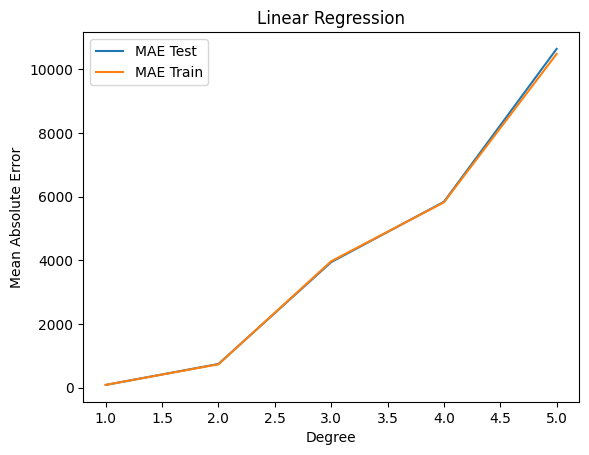

CPU times: user 15min 34s, sys: 59 s, total: 16min 33s
Wall time: 10min 4s


In [ ]:
%%time
MAE_test_LR = []
MAE_train_LR = []

for i in degrees:
    print('Degree of Polynomial Transform:', i)

    LR = make_pipeline(PolynomialFeatures(i, include_bias=False), LinearRegression()).fit(X_train, Y_train)

    Y_predicted_test_LR = LR.predict(X_test)
    Y_predicted_train_LR = LR.predict(X_train)

    print('Mean Absoture Error of training set:', MAE(Y_predicted_train_LR, Y_train))
    print('Mean Squared Error of training set:', MSE(Y_predicted_train_LR, Y_train))

    print('Mean Absoture Error of test set:', MAE(Y_predicted_test_LR, Y_test))
    print('Mean Squared Error of test set:', MSE(Y_predicted_test_LR, Y_test))

    MAE_test_LR.append(MAE(Y_test, Y_predicted_test_LR))
    MAE_train_LR.append(MAE(Y_train, Y_predicted_train_LR))

    print('\n====================================\n')

fig, ax = plt.subplots()

# Plot the data on the subplot
ax.plot(degrees, MAE_test_LR, label='MAE Test')
ax.plot(degrees, MAE_train_LR, label='MAE Train')

# Add a legend to the subplot
ax.legend()

# Set the X and Y axis labels and the title
ax.set_xlabel('Degree')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Linear Regression')

# Show the plot
plt.show()

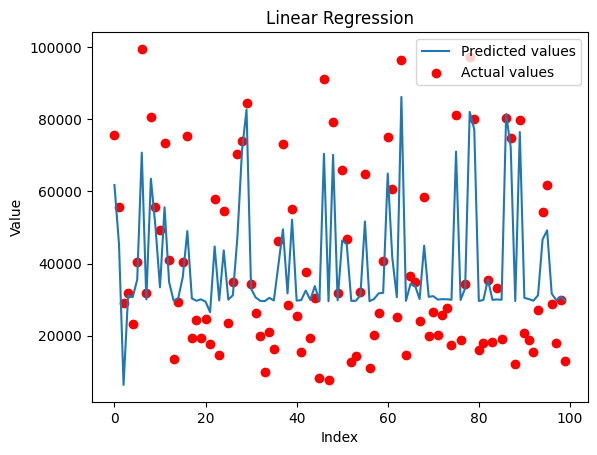

In [ ]:
plt.plot(Y_predicted_test_LR[:100], label='Predicted values')

# Create scatter plot for y_test
plt.scatter(range(len(Y_test[:100])), Y_test[:100], marker='o', color='red', label='Actual values')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Linear Regression')

plt.show()

## Ridge

Degree of Polynomial Transform: 1
Mean Absoture Error of training set: 88.401954027046
Mean Squared Error of training set: 1031389.4438400699
Mean Absoture Error of test set: 88.442649411746
Mean Squared Error of test set: 1122249.4525453753


Degree of Polynomial Transform: 2


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.69004e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mean Absoture Error of training set: 2212.20557369759
Mean Squared Error of training set: 10886053.455571724
Mean Absoture Error of test set: 2214.079631286158
Mean Squared Error of test set: 10901426.623225836


Degree of Polynomial Transform: 3
Mean Absoture Error of training set: 2493.2922883468686
Mean Squared Error of training set: 11765454.196096644
Mean Absoture Error of test set: 2515.075529938133
Mean Squared Error of test set: 12064891.505208453


Degree of Polynomial Transform: 4
Mean Absoture Error of training set: 4578.054421990427
Mean Squared Error of training set: 37925080.18753743
Mean Absoture Error of test set: 4610.209451373425
Mean Squared Error of test set: 38457359.25415557


Degree of Polynomial Transform: 5
Mean Absoture Error of training set: 9541.308937044005
Mean Squared Error of training set: 165587498.58819678
Mean Absoture Error of test set: 9698.994297944528
Mean Squared Error of test set: 170280867.53231946




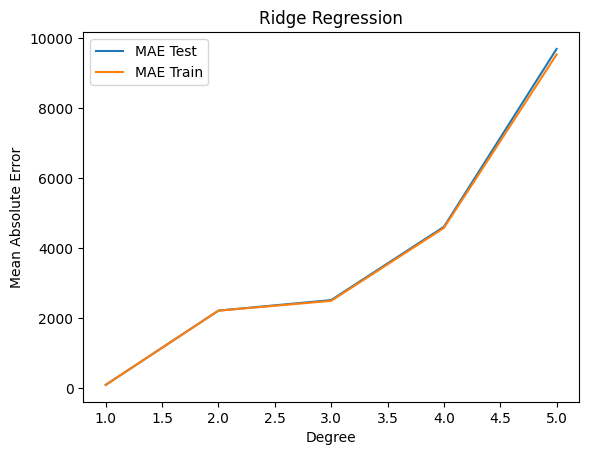

CPU times: user 30min 15s, sys: 1min 25s, total: 31min 41s
Wall time: 19min 7s


In [ ]:
%%time
MAE_test_Rid = []
MAE_train_Rid = []

for i in degrees:
    print('Degree of Polynomial Transform:', i)

    Rid = make_pipeline(PolynomialFeatures(i, include_bias=False), Ridge(alpha = 1e-3, solver = 'auto', random_state = 42)).fit(X_train, Y_train)

    Y_predicted_test_Rid = Rid.predict(X_test)
    Y_predicted_train_Rid = Rid.predict(X_train)

    print('Mean Absoture Error of training set:', MAE(Y_predicted_train_Rid, Y_train))
    print('Mean Squared Error of training set:', MSE(Y_predicted_train_Rid, Y_train))

    print('Mean Absoture Error of test set:', MAE(Y_predicted_test_Rid, Y_test))
    print('Mean Squared Error of test set:', MSE(Y_predicted_test_Rid, Y_test))

    MAE_test_Rid.append(MAE(Y_test, Y_predicted_test_Rid))
    MAE_train_Rid.append(MAE(Y_train, Y_predicted_train_Rid))

    print('\n====================================\n')

fig, ax = plt.subplots()

# Plot the data on the subplot
ax.plot(degrees, MAE_test_Rid, label='MAE Test')
ax.plot(degrees, MAE_train_Rid, label='MAE Train')

# Add a legend to the subplot
ax.legend()

# Set the X and Y axis labels and the title
ax.set_xlabel('Degree')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Ridge Regression')

# Show the plot
plt.show()

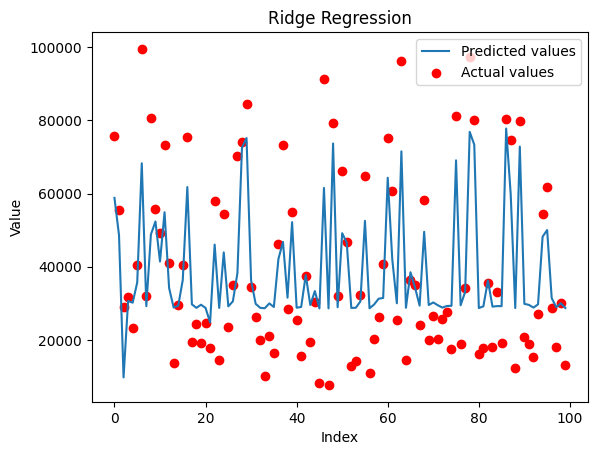

In [ ]:
plt.plot(Y_predicted_test_Rid[:100], label='Predicted values')

# Create scatter plot for y_test
plt.scatter(range(len(Y_test[:100])), Y_test[:100], marker='o', color='red', label='Actual values')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Ridge Regression')

plt.show()

## Lasso

Degree of Polynomial Transform: 1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 88.47166615580534
Mean Squared Error of training set: 1031404.0912960139
Mean Absoture Error of test set: 88.5528688417294
Mean Squared Error of test set: 1122270.463535257


Degree of Polynomial Transform: 2


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 99.48042135230615
Mean Squared Error of training set: 1030580.8599100322
Mean Absoture Error of test set: 100.3682558837638
Mean Squared Error of test set: 1122711.7288495386


Degree of Polynomial Transform: 3


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 106.2310127116567
Mean Squared Error of training set: 1029219.1993489175
Mean Absoture Error of test set: 107.44921790184043
Mean Squared Error of test set: 1126399.8860544534


Degree of Polynomial Transform: 4


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.534e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 102.64915652490066
Mean Squared Error of training set: 1027269.0130951139
Mean Absoture Error of test set: 104.42469160518777
Mean Squared Error of test set: 1125421.2626036971


Degree of Polynomial Transform: 5


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 104.32327151624906
Mean Squared Error of training set: 1025565.2744072444
Mean Absoture Error of test set: 106.67017996277342
Mean Squared Error of test set: 1126447.8576442092




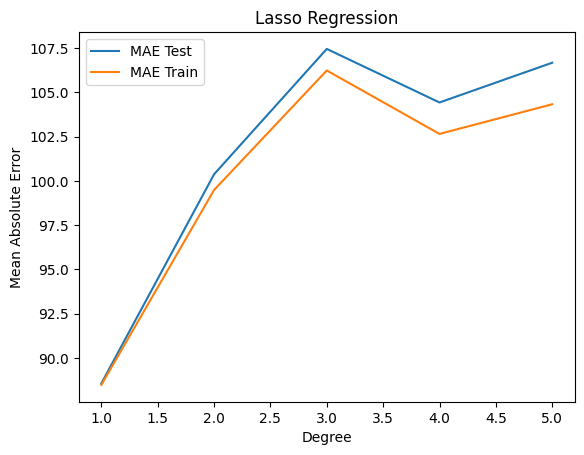

CPU times: user 15min 7s, sys: 1min 43s, total: 16min 50s
Wall time: 10min 7s


In [ ]:
%%time
MAE_test_LaS = []
MAE_train_LaS = []

for i in degrees:
    print('Degree of Polynomial Transform:', i)

    LaS = make_pipeline(PolynomialFeatures(i, include_bias=False), Lasso(alpha = 1e-3, selection = 'cyclic', random_state = 42)).fit(X_train, Y_train)

    Y_predicted_test_LaS = LaS.predict(X_test)
    Y_predicted_train_LaS = LaS.predict(X_train)

    print('Mean Absoture Error of training set:', MAE(Y_predicted_train_LaS, Y_train))
    print('Mean Squared Error of training set:', MSE(Y_predicted_train_LaS, Y_train))

    print('Mean Absoture Error of test set:', MAE(Y_predicted_test_LaS, Y_test))
    print('Mean Squared Error of test set:', MSE(Y_predicted_test_LaS, Y_test))

    MAE_test_LaS.append(MAE(Y_test, Y_predicted_test_LaS))
    MAE_train_LaS.append(MAE(Y_train, Y_predicted_train_LaS))

    print('\n====================================\n')

fig, ax = plt.subplots()

# Plot the data on the subplot
ax.plot(degrees, MAE_test_LaS, label='MAE Test')
ax.plot(degrees, MAE_train_LaS, label='MAE Train')

# Add a legend to the subplot
ax.legend()

# Set the X and Y axis labels and the title
ax.set_xlabel('Degree')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Lasso Regression')

# Show the plot
plt.show()

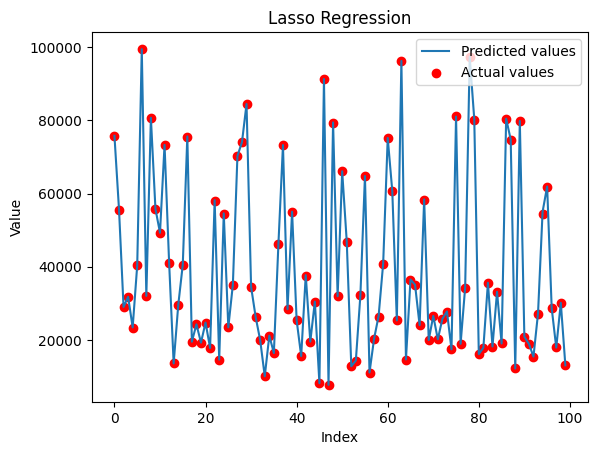

In [ ]:
plt.plot(Y_predicted_test_LaS[:100], label='Predicted values')

# Create scatter plot for y_test
plt.scatter(range(len(Y_test[:100])), Y_test[:100], marker='o', color='red', label='Actual values')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Lasso Regression')

plt.show()

## ElasticNet

Degree of Polynomial Transform: 1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 91.9866978867072
Mean Squared Error of training set: 1031526.2649401962
Mean Absoture Error of test set: 92.0989770663323
Mean Squared Error of test set: 1122283.8550113097


Degree of Polynomial Transform: 2


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 105.41156933397912
Mean Squared Error of training set: 1032524.8728885998
Mean Absoture Error of test set: 106.47757384107436
Mean Squared Error of test set: 1124931.7349963654


Degree of Polynomial Transform: 3


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 110.41517125491748
Mean Squared Error of training set: 1030233.7484498951
Mean Absoture Error of test set: 111.5594381702312
Mean Squared Error of test set: 1127816.4814913478


Degree of Polynomial Transform: 4


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.535e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 105.71292361585844
Mean Squared Error of training set: 1027959.5233440034
Mean Absoture Error of test set: 107.51117601899813
Mean Squared Error of test set: 1125888.687770939


Degree of Polynomial Transform: 5


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e+10, tolerance: 1.814e+09
  model = cd_fast.enet_coordinate_descent(


Mean Absoture Error of training set: 104.95419470168706
Mean Squared Error of training set: 1025742.9482253792
Mean Absoture Error of test set: 107.41947962557374
Mean Squared Error of test set: 1126378.852094385




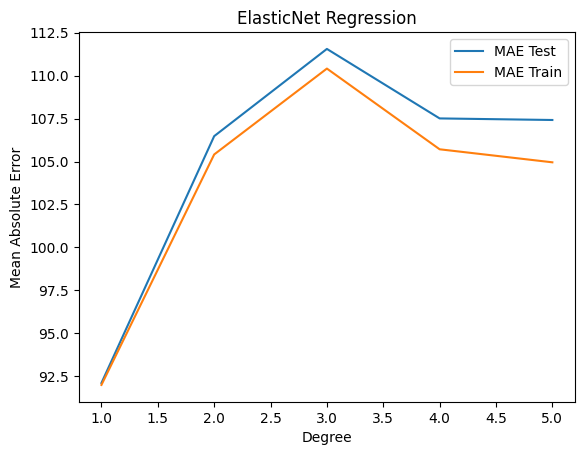

CPU times: user 9min 14s, sys: 1min 23s, total: 10min 38s
Wall time: 6min 24s


In [ ]:
%%time
MAE_test_E = []
MAE_train_E = []

for i in degrees:
    print('Degree of Polynomial Transform:', i)

    Elas = make_pipeline(PolynomialFeatures(i, include_bias=False), ElasticNet(alpha = 1e-3, l1_ratio = 0.5, selection = 'cyclic', random_state = 42)).fit(X_train, Y_train)

    Y_predicted_test_E = Elas.predict(X_test)
    Y_predicted_train_E = Elas.predict(X_train)

    print('Mean Absoture Error of training set:', MAE(Y_predicted_train_E, Y_train))
    print('Mean Squared Error of training set:', MSE(Y_predicted_train_E, Y_train))

    print('Mean Absoture Error of test set:', MAE(Y_predicted_test_E, Y_test))
    print('Mean Squared Error of test set:', MSE(Y_predicted_test_E, Y_test))

    MAE_test_E.append(MAE(Y_test, Y_predicted_test_E))
    MAE_train_E.append(MAE(Y_train, Y_predicted_train_E))

    print('\n====================================\n')

fig, ax = plt.subplots()

# Plot the data on the subplot
ax.plot(degrees, MAE_test_E, label='MAE Test')
ax.plot(degrees, MAE_train_E, label='MAE Train')

# Add a legend to the subplot
ax.legend()

# Set the X and Y axis labels and the title
ax.set_xlabel('Degree')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('ElasticNet Regression')

# Show the plot
plt.show()

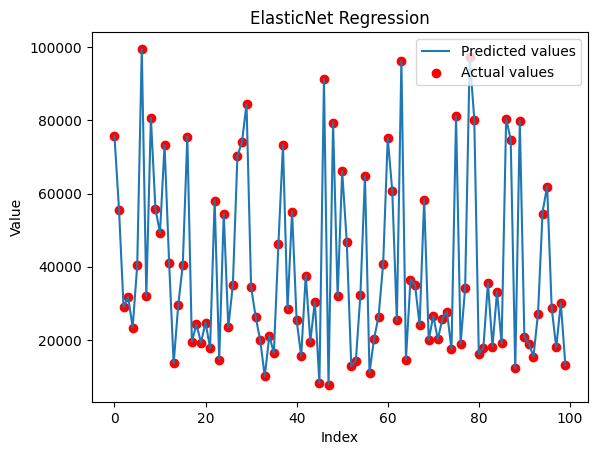

In [ ]:
plt.plot(Y_predicted_test_E[:100], label='Predicted values')

# Create scatter plot for y_test
plt.scatter(range(len(Y_test[:100])), Y_test[:100], marker='o', color='red', label='Actual values')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('ElasticNet Regression')

plt.show()

## Comparision

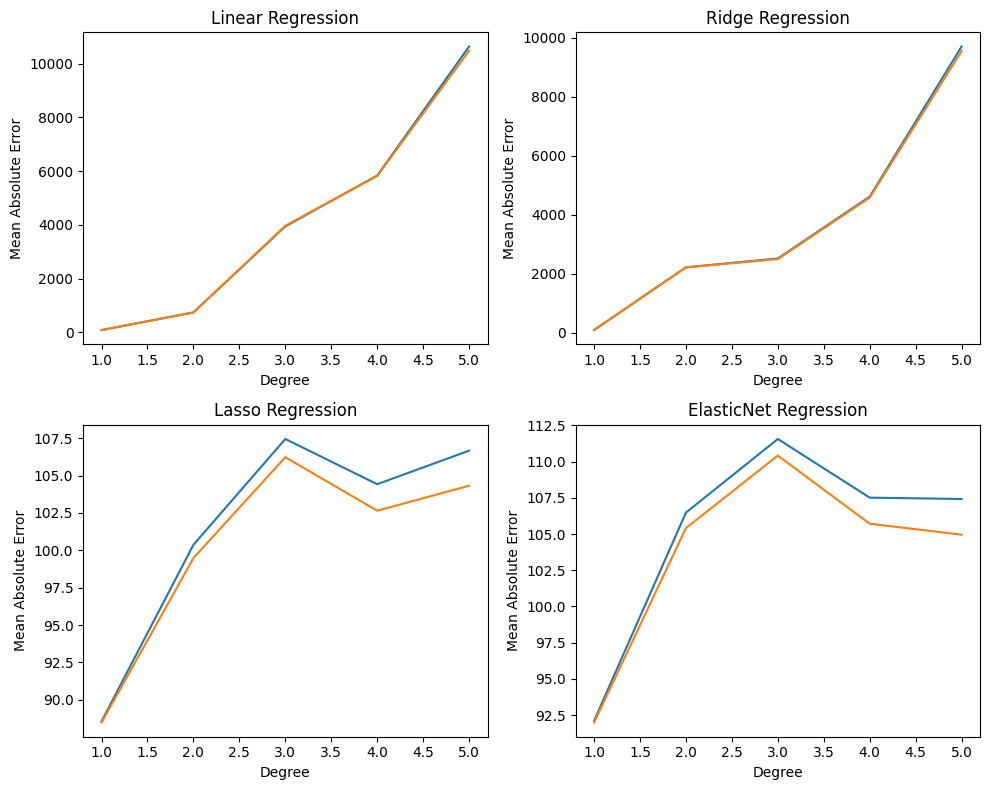

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

# Plot the data on the subplot
ax[0, 0].plot(degrees, MAE_test_LR, label='MAE Test Linear')
ax[0, 0].plot(degrees, MAE_train_LR, label='MAE Train Linear')
ax[0, 0].set_xlabel('Degree')
ax[0, 0].set_ylabel('Mean Absolute Error')
ax[0, 0].set_title('Linear Regression')

ax[0, 1].plot(degrees, MAE_test_Rid, label='MAE Test Ridge')
ax[0, 1].plot(degrees, MAE_train_Rid, label='MAE Train Ridge')
ax[0, 1].set_xlabel('Degree')
ax[0, 1].set_ylabel('Mean Absolute Error')
ax[0, 1].set_title('Ridge Regression')


ax[1, 0].plot(degrees, MAE_test_LaS, label='MAE Test Lasso')
ax[1, 0].plot(degrees, MAE_train_LaS, label='MAE Train Lasso')
ax[1, 0].set_xlabel('Degree')
ax[1, 0].set_ylabel('Mean Absolute Error')
ax[1, 0].set_title('Lasso Regression')


ax[1, 1].plot(degrees, MAE_test_E, label='MAE Test Elastic')
ax[1, 1].plot(degrees, MAE_train_E, label='MAE Train Elastic')
ax[1, 1].set_xlabel('Degree')
ax[1, 1].set_ylabel('Mean Absolute Error')
ax[1, 1].set_title('ElasticNet Regression')

plt.tight_layout()
plt.show()

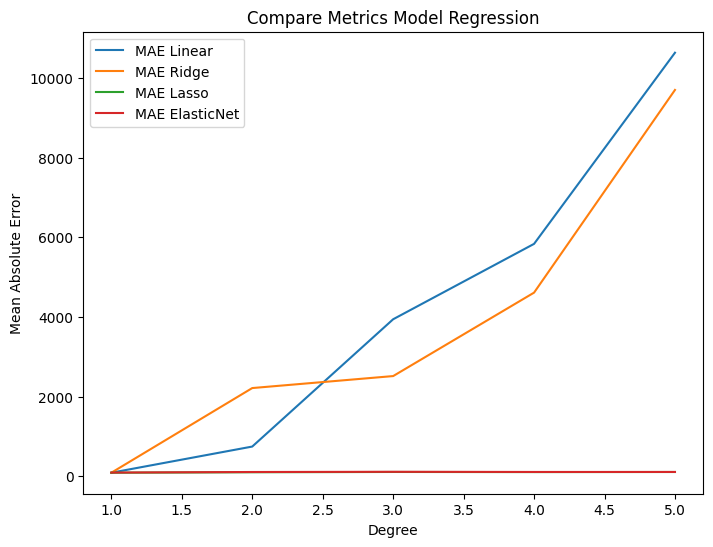

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(degrees, MAE_test_LR, label = 'MAE Linear')
ax.plot(degrees, MAE_test_Rid, label = 'MAE Ridge')
ax.plot(degrees, MAE_test_LaS, label = 'MAE Lasso')
ax.plot(degrees, MAE_test_E, label = 'MAE ElasticNet')
ax.legend()
ax.set_xlabel('Degree')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Compare Metrics Model Regression')

plt.show()

## Conclusion

Seem likes Lasso is the best Regression Model for regularization for this dataset, ElasticNet is good either but It have to tune alpha carefully

If degree of polynomial is to high, model will be overfitting (or worst underfitting like above)